In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [2]:
df_train = pd.read_excel(r'C:\Users\lenovo\Downloads\DS_Practice\MACHINEHACK HACKATHONS\Book-Price-MachineHack\Data\Data_Train.xlsx')

In [3]:
df_test = pd.read_excel(r'C:\Users\lenovo\Downloads\DS_Practice\MACHINEHACK HACKATHONS\Book-Price-MachineHack\Data\Data_Test.xlsx')

In [4]:
df_train.head(3)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 243.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1560 non-null   object
 1   Author        1560 non-null   object
 2   Edition       1560 non-null   object
 3   Reviews       1560 non-null   object
 4   Ratings       1560 non-null   object
 5   Synopsis      1560 non-null   object
 6   Genre         1560 non-null   object
 7   BookCategory  1560 non-null   object
dtypes: object(8)
memory usage: 48.8+ KB


## Data Exploration

### Analyse Price of book column.

Let's proceed and check the distribution of the target variable.

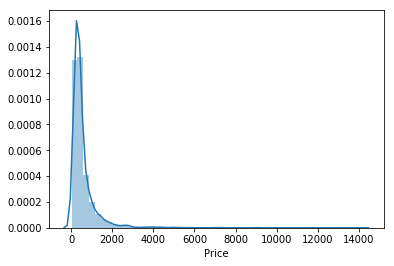

In [7]:
#SalePrice
sns.distplot(df_train['Price'])

In [8]:
#skewness
print("The skewness of SalePrice is {}".format(df_train['Price'].skew()))

The skewness of SalePrice is 6.749865573718627


Let's log transform this variable and see if this variable distribution can get any closer to normal.

Skewness is 0.42013939835002867


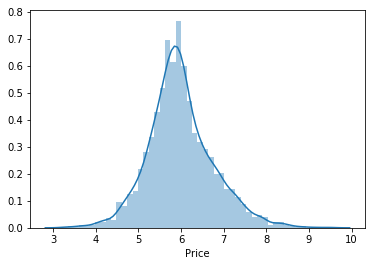

In [9]:
#now transforming the target variable
target = np.log(df_train['Price'])
print('Skewness is', target.skew())
sns.distplot(target)

### Analyse Genre column in train data set.

In [10]:
df_train.Genre.value_counts(normalize=True)*100

Action & Adventure (Books)               15.183582
Romance (Books)                           6.717973
Biographies & Autobiographies (Books)     5.980439
Crime, Thriller & Mystery (Books)         4.425204
Contemporary Fiction (Books)              4.104537
                                           ...    
Basketball (Books)                        0.016033
Target Shooting (Books)                   0.016033
Waste Management                          0.016033
Specialty Travel                          0.016033
Children's Science Fiction (Books)        0.016033
Name: Genre, Length: 345, dtype: float64

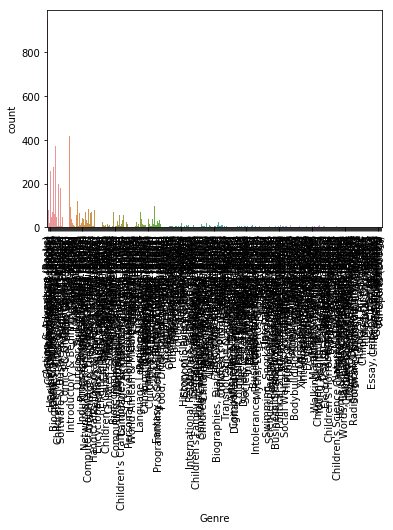

In [18]:
sns.countplot(x='Genre', data=df_train)
plt.xticks(rotation='vertical')
plt.show()

Too many categories in genre column so it is irrelevant to add Genre column in predictive model.  

### Analyse BookCategory column in train data set.

In [19]:
df_train.BookCategory.value_counts(normalize=True)*100

Action & Adventure                      13.115280
Crime, Thriller & Mystery               11.592112
Biographies, Diaries & True Accounts     9.555876
Language, Linguistics & Writing          9.523810
Comics & Mangas                          9.347443
Romance                                  8.978676
Humour                                   8.658009
Arts, Film & Photography                 8.289242
Computing, Internet & Digital Media      8.177008
Sports                                   7.551708
Politics                                 5.210839
Name: BookCategory, dtype: float64

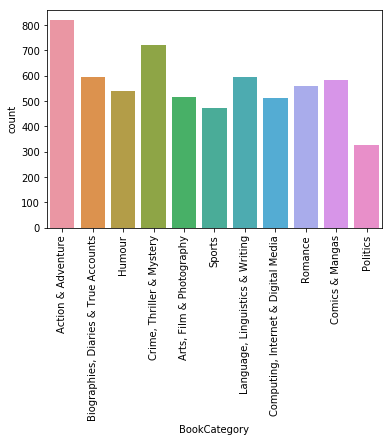

In [20]:
sns.countplot(x='BookCategory', data=df_train)
plt.xticks(rotation='vertical')
plt.show()

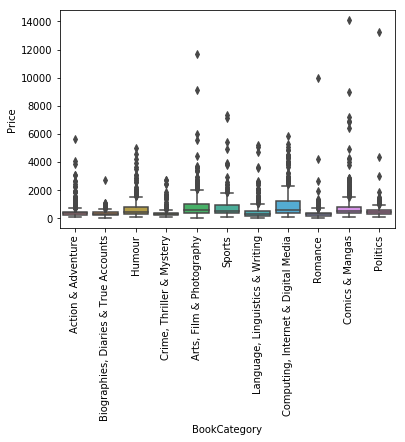

In [21]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variables

sns.boxplot(x='BookCategory', y = 'Price', data=df_train)
plt.xticks(rotation = 'vertical')
plt.show()

In [22]:
## Cricket movie :- Fire In Babylon

In [23]:
## Title column is not necessary to add in prediction model.
df_train.Title.value_counts()

Casino Royale: James Bond 007 (Vintage)                                                             4
A Game of Thrones (A Song of Ice and Fire)                                                          4
The Stone Leopard                                                                                   3
Innovators: How a Group of Inventors, Hackers, Geniuses and Geeks Created the Digital Revolution    3
Leviathan (Penguin Classics)                                                                        3
                                                                                                   ..
The Appeal                                                                                          1
Grammar 2 Pupil Book: In Precursive Letters (British English edition) (Jolly Phonics Grammar)       1
Writing That Works, 3rd Edition: How to Communicate Effectively in Business                         1
The Art of Big Hero 6                                                             

In [24]:
df_train.Author.value_counts(normalize=True)*100

Agatha Christie    1.106301
Ladybird           0.785634
DK                 0.769601
Albert Uderzo      0.545134
Herge              0.545134
                     ...   
Alex Hutchinson    0.016033
Brian Brushwood    0.016033
Jim Dwyer          0.016033
Vivek Kulkarni     0.016033
Beck Weathers      0.016033
Name: Author, Length: 3679, dtype: float64

## Data Pre Processing 

In [25]:
#Creating a copy of the train and test datasets
test_copy  = df_test.copy()
train_copy  = df_train.copy()

In [26]:
##Concat Train and Test datasets
train_copy['train']  = 1
test_copy['train']  = 0
df = pd.concat([train_copy, test_copy], axis=0,sort=False)

In [27]:
## Remove title column from data set because it is not necessary in model development.
df.drop(columns ='Title', axis=1, inplace =True)

In [28]:
df.drop(columns=['Synopsis', 'Author','Genre'], axis=1, inplace=True)

## Feature Engineering

In [29]:
## Extract reviews in numeric form 
df['Reviews(out_of_5)'] = df['Reviews'].str[:3]
## Make column numeric
df['Reviews(out_of_5)'] = pd.to_numeric(df["Reviews(out_of_5)"]) 
## drop reviews column
df.drop(['Reviews'],axis=1, inplace=True)

In [30]:
df['Edition_date'] = df['Edition'].str[-11:]

In [31]:
df['Edition_date'].head(5)

0    10 Mar 2016
1     7 Nov 2012
2    25 Feb 1982
3     5 Oct 2017
4    10 Oct 2006
Name: Edition_date, dtype: object

In [32]:
## Extract ratings in numeric form 
df['Ratings_count'] = df['Ratings'].str[:2]

In [33]:
import re

df['Ratings_count'] = df['Ratings'].str.replace(r'[^\d.]+', '')

In [34]:
## Make column data type numeric
df['Ratings_count'] = pd.to_numeric(df['Ratings_count'])

## Drop Ratings column
90df.drop(['Ratings'], axis=1, inplace=True)

## Drop Edition column in dataframe.
df.drop(['Edition'], axis=1, inplace=True)

In [35]:
df.head()

,BookCategory,Price,train,Reviews(out_of_5),Edition_date,Ratings_count
0,Action & Adventure,220.00,1,4.0,10 Mar 2016,8
1,"Biographies, Diaries & True Accounts",202.93,1,3.9,7 Nov 2012,14
2,Humour,299.00,1,4.8,25 Feb 1982,6
3,"Crime, Thriller & Mystery",180.00,1,4.1,5 Oct 2017,13
4,"Arts, Film & Photography",965.62,1,5.0,10 Oct 2006,1


In [36]:
##df_author = df_train.Author.value_counts().loc[lambda x: x>15].reset_index()['index']

## And if you don't need to have the result within a series, just do this:
## df2.mi.value_counts().loc[lambda x: x>5].index

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BookCategory       7797 non-null   object 
 1   Price              6237 non-null   float64
 2   train              7797 non-null   int64  
 3   Reviews(out_of_5)  7797 non-null   float64
 4   Edition_date       7797 non-null   object 
 5   Ratings_count      7797 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 365.5+ KB


In [ ]:
df["Year"] = df["date"].str[3:5]
df["Year"] = df["Month"].astype('int32')